[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving baddata.txt to baddata.txt


In [1]:
!ls

datalab


In [2]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [4]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 128
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

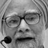

In [13]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

#model.add(Flatten())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())


model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(7))
model.add(Activation('softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        153       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 48, 48, 64)        5760      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [20]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=150,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/150
224/223 [==============================] - 55s 247ms/step - loss: 0.7157 - acc: 0.7325 - val_loss: 1.0062 - val_acc: 0.6572

Epoch 00001: val_acc did not improve from 0.67392
Epoch 2/150
224/223 [==============================] - 55s 246ms/step - loss: 0.7097 - acc: 0.7322 - val_loss: 1.0382 - val_acc: 0.6544

Epoch 00002: val_acc did not improve from 0.67392
Epoch 3/150
 34/223 [===>..........................] - ETA: 44s - loss: 0.6826 - acc: 0.7445

224/223 [==============================] - 55s 246ms/step - loss: 0.7021 - acc: 0.7365 - val_loss: 1.0433 - val_acc: 0.6611

Epoch 00003: val_acc did not improve from 0.67392
Epoch 4/150
224/223 [==============================] - 55s 246ms/step - loss: 0.7027 - acc: 0.7361 - val_loss: 1.0719 - val_acc: 0.6563

Epoch 00004: val_acc did not improve from 0.67392
Epoch 5/150
 53/223 [======>.......................] - ETA: 39s - loss: 0.6936 - acc: 0.7405

224/223 [==============================] - 55s 246ms/step - loss: 0.7033 - acc: 0.7355 - val_loss: 1.0541 - val_acc: 0.6611

Epoch 00005: val_acc did not improve from 0.67392
Epoch 6/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6997 - acc: 0.7393 - val_loss: 1.0439 - val_acc: 0.6589

Epoch 00006: val_acc did not improve from 0.67392
Epoch 7/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6873 - acc: 0.7391

224/223 [==============================] - 55s 244ms/step - loss: 0.7017 - acc: 0.7368 - val_loss: 1.0518 - val_acc: 0.6630

Epoch 00007: val_acc did not improve from 0.67392
Epoch 8/150
224/223 [==============================] - 55s 244ms/step - loss: 0.7030 - acc: 0.7390 - val_loss: 1.0267 - val_acc: 0.6597

Epoch 00008: val_acc did not improve from 0.67392
Epoch 9/150
 57/223 [======>.......................] - ETA: 39s - loss: 0.6708 - acc: 0.7479

224/223 [==============================] - 55s 245ms/step - loss: 0.6964 - acc: 0.7384 - val_loss: 1.0254 - val_acc: 0.6628

Epoch 00009: val_acc did not improve from 0.67392
Epoch 10/150
224/223 [==============================] - 55s 245ms/step - loss: 0.6915 - acc: 0.7416 - val_loss: 1.0595 - val_acc: 0.6636

Epoch 00010: val_acc did not improve from 0.67392
Epoch 11/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6906 - acc: 0.7425

224/223 [==============================] - 55s 245ms/step - loss: 0.6922 - acc: 0.7408 - val_loss: 1.0535 - val_acc: 0.6667

Epoch 00011: val_acc did not improve from 0.67392
Epoch 12/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6913 - acc: 0.7420 - val_loss: 1.0594 - val_acc: 0.6614

Epoch 00012: val_acc did not improve from 0.67392
Epoch 13/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6870 - acc: 0.7451

224/223 [==============================] - 55s 244ms/step - loss: 0.6832 - acc: 0.7468 - val_loss: 1.0929 - val_acc: 0.6600

Epoch 00013: val_acc did not improve from 0.67392
Epoch 14/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6910 - acc: 0.7420 - val_loss: 1.0502 - val_acc: 0.6628

Epoch 00014: val_acc did not improve from 0.67392
Epoch 15/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6650 - acc: 0.7464

224/223 [==============================] - 55s 244ms/step - loss: 0.6946 - acc: 0.7401 - val_loss: 1.0697 - val_acc: 0.6630

Epoch 00015: val_acc did not improve from 0.67392
Epoch 16/150
224/223 [==============================] - 55s 245ms/step - loss: 0.6905 - acc: 0.7433 - val_loss: 1.0560 - val_acc: 0.6614

Epoch 00016: val_acc did not improve from 0.67392
Epoch 17/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6808 - acc: 0.7437

224/223 [==============================] - 55s 244ms/step - loss: 0.6865 - acc: 0.7442 - val_loss: 1.0286 - val_acc: 0.6577

Epoch 00017: val_acc did not improve from 0.67392
Epoch 18/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6805 - acc: 0.7445 - val_loss: 1.0685 - val_acc: 0.6611

Epoch 00018: val_acc did not improve from 0.67392
Epoch 19/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6692 - acc: 0.7525

224/223 [==============================] - 55s 244ms/step - loss: 0.6809 - acc: 0.7452 - val_loss: 1.0314 - val_acc: 0.6664

Epoch 00019: val_acc did not improve from 0.67392
Epoch 20/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6820 - acc: 0.7432 - val_loss: 1.0545 - val_acc: 0.6625

Epoch 00020: val_acc did not improve from 0.67392
Epoch 21/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6580 - acc: 0.7554

224/223 [==============================] - 55s 244ms/step - loss: 0.6799 - acc: 0.7448 - val_loss: 1.0384 - val_acc: 0.6661

Epoch 00021: val_acc did not improve from 0.67392
Epoch 22/150
224/223 [==============================] - 55s 245ms/step - loss: 0.6772 - acc: 0.7467 - val_loss: 1.0789 - val_acc: 0.6603

Epoch 00022: val_acc did not improve from 0.67392
Epoch 23/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6674 - acc: 0.7490

224/223 [==============================] - 55s 246ms/step - loss: 0.6725 - acc: 0.7461 - val_loss: 1.0622 - val_acc: 0.6614

Epoch 00023: val_acc did not improve from 0.67392
Epoch 24/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6680 - acc: 0.7504 - val_loss: 1.0909 - val_acc: 0.6536

Epoch 00024: val_acc did not improve from 0.67392
Epoch 25/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6650 - acc: 0.7464

224/223 [==============================] - 55s 243ms/step - loss: 0.6778 - acc: 0.7446 - val_loss: 1.0525 - val_acc: 0.6630

Epoch 00025: val_acc did not improve from 0.67392
Epoch 26/150
224/223 [==============================] - 55s 245ms/step - loss: 0.6752 - acc: 0.7449 - val_loss: 1.0798 - val_acc: 0.6550

Epoch 00026: val_acc did not improve from 0.67392
Epoch 27/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6550 - acc: 0.7531

224/223 [==============================] - 55s 243ms/step - loss: 0.6675 - acc: 0.7519 - val_loss: 1.0817 - val_acc: 0.6650

Epoch 00027: val_acc did not improve from 0.67392
Epoch 28/150
224/223 [==============================] - 55s 243ms/step - loss: 0.6701 - acc: 0.7499 - val_loss: 1.0704 - val_acc: 0.6650

Epoch 00028: val_acc did not improve from 0.67392
Epoch 29/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6496 - acc: 0.7588

224/223 [==============================] - 55s 244ms/step - loss: 0.6609 - acc: 0.7534 - val_loss: 1.0679 - val_acc: 0.6575

Epoch 00029: val_acc did not improve from 0.67392
Epoch 30/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6612 - acc: 0.7493 - val_loss: 1.0748 - val_acc: 0.6597

Epoch 00030: val_acc did not improve from 0.67392
Epoch 31/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6596 - acc: 0.7575

224/223 [==============================] - 54s 243ms/step - loss: 0.6595 - acc: 0.7536 - val_loss: 1.0658 - val_acc: 0.6703

Epoch 00031: val_acc did not improve from 0.67392
Epoch 32/150
224/223 [==============================] - 55s 246ms/step - loss: 0.6610 - acc: 0.7545 - val_loss: 1.0559 - val_acc: 0.6686

Epoch 00032: val_acc did not improve from 0.67392
Epoch 33/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6475 - acc: 0.7555

224/223 [==============================] - 55s 246ms/step - loss: 0.6491 - acc: 0.7582 - val_loss: 1.0894 - val_acc: 0.6636

Epoch 00033: val_acc did not improve from 0.67392
Epoch 34/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6531 - acc: 0.7539 - val_loss: 1.0731 - val_acc: 0.6664

Epoch 00034: val_acc did not improve from 0.67392
Epoch 35/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6684 - acc: 0.7536

224/223 [==============================] - 55s 244ms/step - loss: 0.6564 - acc: 0.7573 - val_loss: 1.1664 - val_acc: 0.6444

Epoch 00035: val_acc did not improve from 0.67392
Epoch 36/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6533 - acc: 0.7533 - val_loss: 1.0973 - val_acc: 0.6619

Epoch 00036: val_acc did not improve from 0.67392
Epoch 37/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6280 - acc: 0.7619

224/223 [==============================] - 55s 244ms/step - loss: 0.6495 - acc: 0.7565 - val_loss: 1.0674 - val_acc: 0.6709

Epoch 00037: val_acc did not improve from 0.67392
Epoch 38/150
224/223 [==============================] - 54s 243ms/step - loss: 0.6460 - acc: 0.7574 - val_loss: 1.1059 - val_acc: 0.6577

Epoch 00038: val_acc did not improve from 0.67392
Epoch 39/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6381 - acc: 0.7595

224/223 [==============================] - 55s 244ms/step - loss: 0.6483 - acc: 0.7571 - val_loss: 1.0973 - val_acc: 0.6580

Epoch 00039: val_acc did not improve from 0.67392
Epoch 40/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6404 - acc: 0.7600 - val_loss: 1.1285 - val_acc: 0.6519

Epoch 00040: val_acc did not improve from 0.67392
Epoch 41/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6314 - acc: 0.7571

224/223 [==============================] - 55s 245ms/step - loss: 0.6460 - acc: 0.7550 - val_loss: 1.0436 - val_acc: 0.6656

Epoch 00041: val_acc did not improve from 0.67392
Epoch 42/150
224/223 [==============================] - 54s 243ms/step - loss: 0.6395 - acc: 0.7606 - val_loss: 1.0984 - val_acc: 0.6650

Epoch 00042: val_acc did not improve from 0.67392
Epoch 43/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6363 - acc: 0.7646

224/223 [==============================] - 55s 244ms/step - loss: 0.6459 - acc: 0.7585 - val_loss: 1.0955 - val_acc: 0.6558

Epoch 00043: val_acc did not improve from 0.67392
Epoch 44/150
224/223 [==============================] - 55s 245ms/step - loss: 0.6427 - acc: 0.7579 - val_loss: 1.0973 - val_acc: 0.6664

Epoch 00044: val_acc did not improve from 0.67392
Epoch 45/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6189 - acc: 0.7669

224/223 [==============================] - 55s 245ms/step - loss: 0.6393 - acc: 0.7610 - val_loss: 1.0819 - val_acc: 0.6572

Epoch 00045: val_acc did not improve from 0.67392
Epoch 46/150
224/223 [==============================] - 55s 244ms/step - loss: 0.6429 - acc: 0.7588 - val_loss: 1.0974 - val_acc: 0.6586

Epoch 00046: val_acc did not improve from 0.67392
Epoch 47/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6249 - acc: 0.7637

224/223 [==============================] - 55s 245ms/step - loss: 0.6344 - acc: 0.7616 - val_loss: 1.0873 - val_acc: 0.6630

Epoch 00047: val_acc did not improve from 0.67392
Epoch 48/150
224/223 [==============================] - 55s 245ms/step - loss: 0.6322 - acc: 0.7648 - val_loss: 1.1220 - val_acc: 0.6533

Epoch 00048: val_acc did not improve from 0.67392
Epoch 49/150
 56/223 [======>.......................] - ETA: 39s - loss: 0.6123 - acc: 0.7694

224/223 [==============================] - 55s 244ms/step - loss: 0.6260 - acc: 0.7664 - val_loss: 1.1198 - val_acc: 0.6541

Epoch 00049: val_acc did not improve from 0.67392
Epoch 50/150
224/223 [==============================] - 55s 246ms/step - loss: 0.6253 - acc: 0.7633 - val_loss: 1.1339 - val_acc: 0.6536

Epoch 00050: val_acc did not improve from 0.67392
Epoch 51/150
 36/223 [===>..........................] - ETA: 44s - loss: 0.5979 - acc: 0.7745

KeyboardInterrupt: ignored

In [0]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=150,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/150
224/223 [==============================] - 86s 385ms/step - loss: 1.7794 - acc: 0.2794 - val_loss: 2.4532 - val_acc: 0.2884

Epoch 00001: val_acc improved from -inf to 0.28842, saving model to Model.best.hdf5
Epoch 2/150
224/223 [==============================] - 84s 373ms/step - loss: 1.6080 - acc: 0.3673 - val_loss: 1.7210 - val_acc: 0.4137

Epoch 00002: val_acc improved from 0.28842 to 0.41367, saving model to Model.best.hdf5
Epoch 3/150
 15/223 [=>............................] - ETA: 1:15 - loss: 1.5599 - acc: 0.3990

224/223 [==============================] - 84s 373ms/step - loss: 1.4907 - acc: 0.4229 - val_loss: 1.5570 - val_acc: 0.4379

Epoch 00003: val_acc improved from 0.41367 to 0.43794, saving model to Model.best.hdf5
Epoch 4/150
224/223 [==============================] - 84s 374ms/step - loss: 1.4041 - acc: 0.4642 - val_loss: 1.7731 - val_acc: 0.4391

Epoch 00004: val_acc improved from 0.43794 to 0.43905, saving model to Model.best.hdf5
Epoch 5/150
 27/223 [==>...........................] - ETA: 1:10 - loss: 1.3778 - acc: 0.4763

224/223 [==============================] - 84s 373ms/step - loss: 1.3504 - acc: 0.4871 - val_loss: 1.3599 - val_acc: 0.5043

Epoch 00005: val_acc improved from 0.43905 to 0.50432, saving model to Model.best.hdf5
Epoch 6/150
224/223 [==============================] - 84s 374ms/step - loss: 1.3131 - acc: 0.4957 - val_loss: 1.4018 - val_acc: 0.4962

Epoch 00006: val_acc did not improve from 0.50432
Epoch 7/150
 31/223 [===>..........................] - ETA: 1:09 - loss: 1.2866 - acc: 0.5149

224/223 [==============================] - 84s 373ms/step - loss: 1.2762 - acc: 0.5168 - val_loss: 1.3137 - val_acc: 0.5180

Epoch 00007: val_acc improved from 0.50432 to 0.51799, saving model to Model.best.hdf5
Epoch 8/150
224/223 [==============================] - 84s 374ms/step - loss: 1.2479 - acc: 0.5228 - val_loss: 1.2157 - val_acc: 0.5523

Epoch 00008: val_acc improved from 0.51799 to 0.55230, saving model to Model.best.hdf5
Epoch 9/150
 29/223 [==>...........................] - ETA: 1:10 - loss: 1.2225 - acc: 0.5380

224/223 [==============================] - 84s 374ms/step - loss: 1.2266 - acc: 0.5320 - val_loss: 1.2089 - val_acc: 0.5473

Epoch 00009: val_acc did not improve from 0.55230
Epoch 10/150
224/223 [==============================] - 84s 374ms/step - loss: 1.2108 - acc: 0.5395 - val_loss: 1.3121 - val_acc: 0.5191

Epoch 00010: val_acc did not improve from 0.55230
Epoch 11/150
 51/223 [=====>........................] - ETA: 1:02 - loss: 1.2068 - acc: 0.5415

224/223 [==============================] - 84s 373ms/step - loss: 1.1917 - acc: 0.5507 - val_loss: 1.1733 - val_acc: 0.5646

Epoch 00011: val_acc improved from 0.55230 to 0.56457, saving model to Model.best.hdf5
Epoch 12/150
224/223 [==============================] - 84s 374ms/step - loss: 1.1746 - acc: 0.5527 - val_loss: 1.1517 - val_acc: 0.5702

Epoch 00012: val_acc improved from 0.56457 to 0.57015, saving model to Model.best.hdf5
Epoch 13/150
 31/223 [===>..........................] - ETA: 1:09 - loss: 1.1400 - acc: 0.5658

224/223 [==============================] - 84s 374ms/step - loss: 1.1607 - acc: 0.5592 - val_loss: 1.1797 - val_acc: 0.5640

Epoch 00013: val_acc did not improve from 0.57015
Epoch 14/150
224/223 [==============================] - 84s 374ms/step - loss: 1.1455 - acc: 0.5695 - val_loss: 1.1686 - val_acc: 0.5693

Epoch 00014: val_acc did not improve from 0.57015
Epoch 15/150
 51/223 [=====>........................] - ETA: 1:01 - loss: 1.1485 - acc: 0.5664

224/223 [==============================] - 84s 373ms/step - loss: 1.1332 - acc: 0.5728 - val_loss: 1.1252 - val_acc: 0.5902

Epoch 00015: val_acc improved from 0.57015 to 0.59024, saving model to Model.best.hdf5
Epoch 16/150
224/223 [==============================] - 84s 374ms/step - loss: 1.1261 - acc: 0.5734 - val_loss: 1.1983 - val_acc: 0.5601

Epoch 00016: val_acc did not improve from 0.59024
Epoch 17/150
 34/223 [===>..........................] - ETA: 1:08 - loss: 1.1190 - acc: 0.5788

224/223 [==============================] - 84s 373ms/step - loss: 1.1146 - acc: 0.5765 - val_loss: 1.2598 - val_acc: 0.5364

Epoch 00017: val_acc did not improve from 0.59024
Epoch 18/150
224/223 [==============================] - 84s 373ms/step - loss: 1.1041 - acc: 0.5827 - val_loss: 1.1459 - val_acc: 0.5674

Epoch 00018: val_acc did not improve from 0.59024
Epoch 19/150
 52/223 [=====>........................] - ETA: 1:02 - loss: 1.0829 - acc: 0.5859

224/223 [==============================] - 84s 373ms/step - loss: 1.0933 - acc: 0.5851 - val_loss: 1.1354 - val_acc: 0.5763

Epoch 00019: val_acc did not improve from 0.59024
Epoch 20/150
224/223 [==============================] - 84s 374ms/step - loss: 1.0765 - acc: 0.5912 - val_loss: 1.2312 - val_acc: 0.5570

Epoch 00020: val_acc did not improve from 0.59024
Epoch 21/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 1.1000 - acc: 0.5882

224/223 [==============================] - 84s 374ms/step - loss: 1.0703 - acc: 0.5986 - val_loss: 1.0925 - val_acc: 0.6036

Epoch 00021: val_acc improved from 0.59024 to 0.60363, saving model to Model.best.hdf5
Epoch 22/150
224/223 [==============================] - 84s 373ms/step - loss: 1.0646 - acc: 0.5955 - val_loss: 1.0519 - val_acc: 0.6098

Epoch 00022: val_acc improved from 0.60363 to 0.60976, saving model to Model.best.hdf5
Epoch 23/150
 32/223 [===>..........................] - ETA: 1:09 - loss: 1.0315 - acc: 0.6096

224/223 [==============================] - 84s 374ms/step - loss: 1.0501 - acc: 0.6026 - val_loss: 1.1823 - val_acc: 0.5741

Epoch 00023: val_acc did not improve from 0.60976
Epoch 24/150
224/223 [==============================] - 84s 373ms/step - loss: 1.0464 - acc: 0.6033 - val_loss: 1.0558 - val_acc: 0.6089

Epoch 00024: val_acc did not improve from 0.60976
Epoch 25/150
 52/223 [=====>........................] - ETA: 1:01 - loss: 1.0262 - acc: 0.6109

224/223 [==============================] - 84s 373ms/step - loss: 1.0343 - acc: 0.6095 - val_loss: 1.1343 - val_acc: 0.5902

Epoch 00025: val_acc did not improve from 0.60976
Epoch 26/150
224/223 [==============================] - 84s 374ms/step - loss: 1.0307 - acc: 0.6111 - val_loss: 1.1273 - val_acc: 0.5930

Epoch 00026: val_acc did not improve from 0.60976
Epoch 27/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 1.0056 - acc: 0.6241

224/223 [==============================] - 84s 374ms/step - loss: 1.0197 - acc: 0.6160 - val_loss: 1.1440 - val_acc: 0.5992

Epoch 00027: val_acc did not improve from 0.60976
Epoch 28/150
224/223 [==============================] - 84s 373ms/step - loss: 1.0118 - acc: 0.6194 - val_loss: 1.1500 - val_acc: 0.5738

Epoch 00028: val_acc did not improve from 0.60976
Epoch 29/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.9910 - acc: 0.6258

224/223 [==============================] - 84s 373ms/step - loss: 1.0031 - acc: 0.6220 - val_loss: 1.0682 - val_acc: 0.6056

Epoch 00029: val_acc did not improve from 0.60976
Epoch 30/150
224/223 [==============================] - 84s 373ms/step - loss: 0.9947 - acc: 0.6244 - val_loss: 1.0655 - val_acc: 0.6134

Epoch 00030: val_acc improved from 0.60976 to 0.61339, saving model to Model.best.hdf5
Epoch 31/150
 52/223 [=====>........................] - ETA: 1:02 - loss: 0.9719 - acc: 0.6330

224/223 [==============================] - 84s 373ms/step - loss: 0.9968 - acc: 0.6250 - val_loss: 1.0909 - val_acc: 0.6000

Epoch 00031: val_acc did not improve from 0.61339
Epoch 32/150
224/223 [==============================] - 84s 373ms/step - loss: 0.9859 - acc: 0.6293 - val_loss: 1.0337 - val_acc: 0.6229

Epoch 00032: val_acc improved from 0.61339 to 0.62287, saving model to Model.best.hdf5
Epoch 33/150
 51/223 [=====>........................] - ETA: 1:02 - loss: 0.9621 - acc: 0.6406

224/223 [==============================] - 84s 373ms/step - loss: 0.9773 - acc: 0.6325 - val_loss: 1.0958 - val_acc: 0.6056

Epoch 00033: val_acc did not improve from 0.62287
Epoch 34/150
224/223 [==============================] - 84s 374ms/step - loss: 0.9697 - acc: 0.6347 - val_loss: 1.0862 - val_acc: 0.6000

Epoch 00034: val_acc did not improve from 0.62287
Epoch 35/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 0.9668 - acc: 0.6410

224/223 [==============================] - 84s 373ms/step - loss: 0.9674 - acc: 0.6387 - val_loss: 1.0431 - val_acc: 0.6218

Epoch 00035: val_acc did not improve from 0.62287
Epoch 36/150
224/223 [==============================] - 84s 373ms/step - loss: 0.9561 - acc: 0.6443 - val_loss: 1.0691 - val_acc: 0.6137

Epoch 00036: val_acc did not improve from 0.62287
Epoch 37/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.9361 - acc: 0.6525

224/223 [==============================] - 84s 373ms/step - loss: 0.9506 - acc: 0.6430 - val_loss: 1.0150 - val_acc: 0.6279

Epoch 00037: val_acc improved from 0.62287 to 0.62789, saving model to Model.best.hdf5
Epoch 38/150
224/223 [==============================] - 84s 373ms/step - loss: 0.9437 - acc: 0.6459 - val_loss: 1.0650 - val_acc: 0.6262

Epoch 00038: val_acc did not improve from 0.62789
Epoch 39/150
 35/223 [===>..........................] - ETA: 1:07 - loss: 0.9081 - acc: 0.6592

224/223 [==============================] - 84s 373ms/step - loss: 0.9405 - acc: 0.6459 - val_loss: 1.0005 - val_acc: 0.6192

Epoch 00039: val_acc did not improve from 0.62789
Epoch 40/150
224/223 [==============================] - 84s 373ms/step - loss: 0.9325 - acc: 0.6509 - val_loss: 1.1211 - val_acc: 0.5813

Epoch 00040: val_acc did not improve from 0.62789
Epoch 41/150
 52/223 [=====>........................] - ETA: 1:01 - loss: 0.9180 - acc: 0.6541

224/223 [==============================] - 84s 373ms/step - loss: 0.9264 - acc: 0.6524 - val_loss: 1.0737 - val_acc: 0.6089

Epoch 00041: val_acc did not improve from 0.62789
Epoch 42/150
224/223 [==============================] - 83s 373ms/step - loss: 0.9183 - acc: 0.6575 - val_loss: 1.0404 - val_acc: 0.6276

Epoch 00042: val_acc did not improve from 0.62789
Epoch 43/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 0.8939 - acc: 0.6696

224/223 [==============================] - 84s 373ms/step - loss: 0.9193 - acc: 0.6587 - val_loss: 1.0214 - val_acc: 0.6254

Epoch 00043: val_acc did not improve from 0.62789
Epoch 44/150
224/223 [==============================] - 84s 373ms/step - loss: 0.9101 - acc: 0.6627 - val_loss: 1.0284 - val_acc: 0.6285

Epoch 00044: val_acc improved from 0.62789 to 0.62845, saving model to Model.best.hdf5
Epoch 45/150
 51/223 [=====>........................] - ETA: 1:01 - loss: 0.8927 - acc: 0.6611

224/223 [==============================] - 84s 373ms/step - loss: 0.9017 - acc: 0.6613 - val_loss: 1.0102 - val_acc: 0.6371

Epoch 00045: val_acc improved from 0.62845 to 0.63710, saving model to Model.best.hdf5
Epoch 46/150
224/223 [==============================] - 84s 373ms/step - loss: 0.8978 - acc: 0.6640 - val_loss: 1.0448 - val_acc: 0.6265

Epoch 00046: val_acc did not improve from 0.63710
Epoch 47/150
 34/223 [===>..........................] - ETA: 1:08 - loss: 0.8772 - acc: 0.6774

224/223 [==============================] - 84s 374ms/step - loss: 0.9009 - acc: 0.6628 - val_loss: 1.0155 - val_acc: 0.6282

Epoch 00047: val_acc did not improve from 0.63710
Epoch 48/150
224/223 [==============================] - 84s 374ms/step - loss: 0.8912 - acc: 0.6686 - val_loss: 1.0149 - val_acc: 0.6209

Epoch 00048: val_acc did not improve from 0.63710
Epoch 49/150
 52/223 [=====>........................] - ETA: 1:02 - loss: 0.8589 - acc: 0.6804

224/223 [==============================] - 84s 373ms/step - loss: 0.8849 - acc: 0.6713 - val_loss: 1.0623 - val_acc: 0.6215

Epoch 00049: val_acc did not improve from 0.63710
Epoch 50/150
224/223 [==============================] - 84s 373ms/step - loss: 0.8731 - acc: 0.6710 - val_loss: 1.0602 - val_acc: 0.6245

Epoch 00050: val_acc did not improve from 0.63710
Epoch 51/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 0.8416 - acc: 0.6841

224/223 [==============================] - 84s 373ms/step - loss: 0.8705 - acc: 0.6750 - val_loss: 1.0145 - val_acc: 0.6377

Epoch 00051: val_acc improved from 0.63710 to 0.63766, saving model to Model.best.hdf5
Epoch 52/150
224/223 [==============================] - 84s 373ms/step - loss: 0.8711 - acc: 0.6751 - val_loss: 1.0284 - val_acc: 0.6351

Epoch 00052: val_acc did not improve from 0.63766
Epoch 53/150
 35/223 [===>..........................] - ETA: 1:08 - loss: 0.8380 - acc: 0.6859

224/223 [==============================] - 84s 373ms/step - loss: 0.8602 - acc: 0.6814 - val_loss: 1.0225 - val_acc: 0.6254

Epoch 00053: val_acc did not improve from 0.63766
Epoch 54/150
224/223 [==============================] - 84s 374ms/step - loss: 0.8557 - acc: 0.6794 - val_loss: 1.0716 - val_acc: 0.6106

Epoch 00054: val_acc did not improve from 0.63766
Epoch 55/150
 52/223 [=====>........................] - ETA: 1:01 - loss: 0.8299 - acc: 0.6935

224/223 [==============================] - 84s 373ms/step - loss: 0.8522 - acc: 0.6828 - val_loss: 1.0781 - val_acc: 0.6301

Epoch 00055: val_acc did not improve from 0.63766
Epoch 56/150
224/223 [==============================] - 84s 374ms/step - loss: 0.8426 - acc: 0.6843 - val_loss: 1.0279 - val_acc: 0.6290

Epoch 00056: val_acc did not improve from 0.63766
Epoch 57/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 0.8103 - acc: 0.6963

224/223 [==============================] - 84s 374ms/step - loss: 0.8438 - acc: 0.6853 - val_loss: 1.0631 - val_acc: 0.6324

Epoch 00057: val_acc did not improve from 0.63766
Epoch 58/150
224/223 [==============================] - 84s 374ms/step - loss: 0.8397 - acc: 0.6873 - val_loss: 1.0632 - val_acc: 0.6237

Epoch 00058: val_acc did not improve from 0.63766
Epoch 59/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.8267 - acc: 0.6948

224/223 [==============================] - 84s 374ms/step - loss: 0.8409 - acc: 0.6852 - val_loss: 1.0142 - val_acc: 0.6463

Epoch 00059: val_acc improved from 0.63766 to 0.64630, saving model to Model.best.hdf5
Epoch 60/150
224/223 [==============================] - 84s 374ms/step - loss: 0.8311 - acc: 0.6926 - val_loss: 1.0329 - val_acc: 0.6232

Epoch 00060: val_acc did not improve from 0.64630
Epoch 61/150
 35/223 [===>..........................] - ETA: 1:06 - loss: 0.8083 - acc: 0.7048

224/223 [==============================] - 84s 374ms/step - loss: 0.8234 - acc: 0.6933 - val_loss: 1.0559 - val_acc: 0.6282

Epoch 00061: val_acc did not improve from 0.64630
Epoch 62/150
224/223 [==============================] - 84s 374ms/step - loss: 0.8171 - acc: 0.6957 - val_loss: 1.0215 - val_acc: 0.6413

Epoch 00062: val_acc did not improve from 0.64630
Epoch 63/150
 52/223 [=====>........................] - ETA: 1:02 - loss: 0.8064 - acc: 0.7040

224/223 [==============================] - 84s 374ms/step - loss: 0.8174 - acc: 0.6989 - val_loss: 1.0291 - val_acc: 0.6438

Epoch 00063: val_acc did not improve from 0.64630
Epoch 64/150
224/223 [==============================] - 83s 373ms/step - loss: 0.8185 - acc: 0.6962 - val_loss: 1.0293 - val_acc: 0.6407

Epoch 00064: val_acc did not improve from 0.64630
Epoch 65/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 0.7799 - acc: 0.7063

224/223 [==============================] - 84s 374ms/step - loss: 0.8072 - acc: 0.6991 - val_loss: 0.9926 - val_acc: 0.6446

Epoch 00065: val_acc did not improve from 0.64630
Epoch 66/150
224/223 [==============================] - 84s 374ms/step - loss: 0.7999 - acc: 0.7025 - val_loss: 1.0042 - val_acc: 0.6449

Epoch 00066: val_acc did not improve from 0.64630
Epoch 67/150
 56/223 [======>.......................] - ETA: 59s - loss: 0.7873 - acc: 0.7045 

224/223 [==============================] - 84s 373ms/step - loss: 0.8074 - acc: 0.6994 - val_loss: 1.0188 - val_acc: 0.6377

Epoch 00067: val_acc did not improve from 0.64630
Epoch 68/150
224/223 [==============================] - 84s 374ms/step - loss: 0.7978 - acc: 0.7035 - val_loss: 1.0349 - val_acc: 0.6396

Epoch 00068: val_acc did not improve from 0.64630
Epoch 69/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.8045 - acc: 0.6961

224/223 [==============================] - 84s 374ms/step - loss: 0.7979 - acc: 0.7021 - val_loss: 1.0352 - val_acc: 0.6466

Epoch 00069: val_acc improved from 0.64630 to 0.64658, saving model to Model.best.hdf5
Epoch 70/150
224/223 [==============================] - 84s 374ms/step - loss: 0.7863 - acc: 0.7057 - val_loss: 1.0575 - val_acc: 0.6377

Epoch 00070: val_acc did not improve from 0.64658
Epoch 71/150
 35/223 [===>..........................] - ETA: 1:06 - loss: 0.7765 - acc: 0.7130

224/223 [==============================] - 84s 373ms/step - loss: 0.7831 - acc: 0.7084 - val_loss: 1.0278 - val_acc: 0.6499

Epoch 00071: val_acc improved from 0.64658 to 0.64993, saving model to Model.best.hdf5
Epoch 72/150
224/223 [==============================] - 84s 373ms/step - loss: 0.7812 - acc: 0.7133 - val_loss: 1.0080 - val_acc: 0.6502

Epoch 00072: val_acc improved from 0.64993 to 0.65021, saving model to Model.best.hdf5
Epoch 73/150
 29/223 [==>...........................] - ETA: 1:10 - loss: 0.7597 - acc: 0.7198

224/223 [==============================] - 84s 373ms/step - loss: 0.7740 - acc: 0.7107 - val_loss: 1.0594 - val_acc: 0.6310

Epoch 00073: val_acc did not improve from 0.65021
Epoch 74/150
224/223 [==============================] - 84s 373ms/step - loss: 0.7697 - acc: 0.7132 - val_loss: 1.1004 - val_acc: 0.6326

Epoch 00074: val_acc did not improve from 0.65021
Epoch 75/150
 51/223 [=====>........................] - ETA: 1:02 - loss: 0.7552 - acc: 0.7189

224/223 [==============================] - 84s 373ms/step - loss: 0.7651 - acc: 0.7150 - val_loss: 1.0617 - val_acc: 0.6296

Epoch 00075: val_acc did not improve from 0.65021
Epoch 76/150
224/223 [==============================] - 84s 373ms/step - loss: 0.7623 - acc: 0.7163 - val_loss: 1.0306 - val_acc: 0.6524

Epoch 00076: val_acc improved from 0.65021 to 0.65244, saving model to Model.best.hdf5
Epoch 77/150
 51/223 [=====>........................] - ETA: 1:02 - loss: 0.7573 - acc: 0.7178

224/223 [==============================] - 84s 373ms/step - loss: 0.7662 - acc: 0.7149 - val_loss: 1.0182 - val_acc: 0.6441

Epoch 00077: val_acc did not improve from 0.65244
Epoch 78/150
224/223 [==============================] - 84s 374ms/step - loss: 0.7616 - acc: 0.7176 - val_loss: 1.0524 - val_acc: 0.6505

Epoch 00078: val_acc did not improve from 0.65244
Epoch 79/150
 55/223 [======>.......................] - ETA: 1:01 - loss: 0.7328 - acc: 0.7291

224/223 [==============================] - 84s 375ms/step - loss: 0.7528 - acc: 0.7197 - val_loss: 1.0359 - val_acc: 0.6485

Epoch 00079: val_acc did not improve from 0.65244
Epoch 80/150
224/223 [==============================] - 84s 375ms/step - loss: 0.7498 - acc: 0.7223 - val_loss: 1.0658 - val_acc: 0.6343

Epoch 00080: val_acc did not improve from 0.65244
Epoch 81/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.7259 - acc: 0.7365

224/223 [==============================] - 84s 375ms/step - loss: 0.7487 - acc: 0.7218 - val_loss: 1.0571 - val_acc: 0.6338

Epoch 00081: val_acc did not improve from 0.65244
Epoch 82/150
224/223 [==============================] - 84s 375ms/step - loss: 0.7452 - acc: 0.7246 - val_loss: 1.0376 - val_acc: 0.6616

Epoch 00082: val_acc improved from 0.65244 to 0.66165, saving model to Model.best.hdf5
Epoch 83/150
 52/223 [=====>........................] - ETA: 1:01 - loss: 0.7068 - acc: 0.7368

224/223 [==============================] - 84s 375ms/step - loss: 0.7412 - acc: 0.7248 - val_loss: 1.0477 - val_acc: 0.6474

Epoch 00083: val_acc did not improve from 0.66165
Epoch 84/150
224/223 [==============================] - 84s 375ms/step - loss: 0.7420 - acc: 0.7247 - val_loss: 1.0325 - val_acc: 0.6536

Epoch 00084: val_acc did not improve from 0.66165
Epoch 85/150
 55/223 [======>.......................] - ETA: 1:01 - loss: 0.7129 - acc: 0.7337

224/223 [==============================] - 84s 375ms/step - loss: 0.7284 - acc: 0.7303 - val_loss: 1.1028 - val_acc: 0.6382

Epoch 00085: val_acc did not improve from 0.66165
Epoch 86/150
224/223 [==============================] - 84s 375ms/step - loss: 0.7268 - acc: 0.7328 - val_loss: 1.0925 - val_acc: 0.6343

Epoch 00086: val_acc did not improve from 0.66165
Epoch 87/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.6906 - acc: 0.7411

224/223 [==============================] - 84s 375ms/step - loss: 0.7221 - acc: 0.7328 - val_loss: 0.9977 - val_acc: 0.6516

Epoch 00087: val_acc did not improve from 0.66165
Epoch 88/150
224/223 [==============================] - 84s 375ms/step - loss: 0.7264 - acc: 0.7287 - val_loss: 1.0758 - val_acc: 0.6388

Epoch 00088: val_acc did not improve from 0.66165
Epoch 89/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.6792 - acc: 0.7496

224/223 [==============================] - 84s 375ms/step - loss: 0.7148 - acc: 0.7355 - val_loss: 1.0343 - val_acc: 0.6432

Epoch 00089: val_acc did not improve from 0.66165
Epoch 90/150
224/223 [==============================] - 84s 375ms/step - loss: 0.7150 - acc: 0.7347 - val_loss: 1.0796 - val_acc: 0.6541

Epoch 00090: val_acc did not improve from 0.66165
Epoch 91/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.7023 - acc: 0.7383

224/223 [==============================] - 84s 375ms/step - loss: 0.7091 - acc: 0.7354 - val_loss: 1.0154 - val_acc: 0.6516

Epoch 00091: val_acc did not improve from 0.66165
Epoch 92/150
224/223 [==============================] - 84s 374ms/step - loss: 0.7115 - acc: 0.7353 - val_loss: 1.0267 - val_acc: 0.6502

Epoch 00092: val_acc did not improve from 0.66165
Epoch 93/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.6951 - acc: 0.7426

224/223 [==============================] - 84s 375ms/step - loss: 0.7133 - acc: 0.7366 - val_loss: 1.0305 - val_acc: 0.6536

Epoch 00093: val_acc did not improve from 0.66165
Epoch 94/150
224/223 [==============================] - 84s 374ms/step - loss: 0.7071 - acc: 0.7358 - val_loss: 1.0391 - val_acc: 0.6455

Epoch 00094: val_acc did not improve from 0.66165
Epoch 95/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.6819 - acc: 0.7529

224/223 [==============================] - 84s 375ms/step - loss: 0.6949 - acc: 0.7430 - val_loss: 1.0536 - val_acc: 0.6505

Epoch 00095: val_acc did not improve from 0.66165
Epoch 96/150
224/223 [==============================] - 84s 374ms/step - loss: 0.6990 - acc: 0.7398 - val_loss: 1.0673 - val_acc: 0.6485

Epoch 00096: val_acc did not improve from 0.66165
Epoch 97/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.6739 - acc: 0.7515

224/223 [==============================] - 84s 374ms/step - loss: 0.7000 - acc: 0.7410 - val_loss: 1.0495 - val_acc: 0.6533

Epoch 00097: val_acc did not improve from 0.66165
Epoch 98/150
224/223 [==============================] - 84s 375ms/step - loss: 0.6941 - acc: 0.7443 - val_loss: 1.0806 - val_acc: 0.6324

Epoch 00098: val_acc did not improve from 0.66165
Epoch 99/150
 56/223 [======>.......................] - ETA: 1:00 - loss: 0.6727 - acc: 0.7514

224/223 [==============================] - 84s 375ms/step - loss: 0.6855 - acc: 0.7460 - val_loss: 1.0418 - val_acc: 0.6421

Epoch 00099: val_acc did not improve from 0.66165
Epoch 100/150
224/223 [==============================] - 84s 375ms/step - loss: 0.6886 - acc: 0.7444 - val_loss: 1.0741 - val_acc: 0.6510

Epoch 00100: val_acc did not improve from 0.66165
Epoch 101/150
 55/223 [======>.......................] - ETA: 1:01 - loss: 0.6517 - acc: 0.7557

224/223 [==============================] - 84s 375ms/step - loss: 0.6824 - acc: 0.7468 - val_loss: 1.0815 - val_acc: 0.6446

Epoch 00101: val_acc did not improve from 0.66165
Epoch 102/150
224/223 [==============================] - 84s 375ms/step - loss: 0.6798 - acc: 0.7494 - val_loss: 1.0648 - val_acc: 0.6550

Epoch 00102: val_acc did not improve from 0.66165
Epoch 103/150
 55/223 [======>.......................] - ETA: 1:01 - loss: 0.6514 - acc: 0.7645

224/223 [==============================] - 84s 374ms/step - loss: 0.6716 - acc: 0.7504 - val_loss: 1.0452 - val_acc: 0.6619

Epoch 00103: val_acc improved from 0.66165 to 0.66192, saving model to Model.best.hdf5
Epoch 104/150
224/223 [==============================] - 84s 375ms/step - loss: 0.6655 - acc: 0.7528 - val_loss: 1.0744 - val_acc: 0.6435

Epoch 00104: val_acc did not improve from 0.66192
Epoch 105/150
 34/223 [===>..........................] - ETA: 1:09 - loss: 0.6628 - acc: 0.7562

224/223 [==============================] - 84s 375ms/step - loss: 0.6709 - acc: 0.7531 - val_loss: 1.0488 - val_acc: 0.6519

Epoch 00105: val_acc did not improve from 0.66192
Epoch 106/150
224/223 [==============================] - 84s 375ms/step - loss: 0.6658 - acc: 0.7519 - val_loss: 1.0841 - val_acc: 0.6416

Epoch 00106: val_acc did not improve from 0.66192
Epoch 107/150
 51/223 [=====>........................] - ETA: 1:02 - loss: 0.6357 - acc: 0.7684

224/223 [==============================] - 84s 375ms/step - loss: 0.6602 - acc: 0.7538 - val_loss: 1.0504 - val_acc: 0.6421

Epoch 00107: val_acc did not improve from 0.66192
Epoch 108/150
224/223 [==============================] - 84s 375ms/step - loss: 0.6611 - acc: 0.7571 - val_loss: 1.0400 - val_acc: 0.6510

Epoch 00108: val_acc did not improve from 0.66192
Epoch 109/150
 54/223 [======>.......................] - ETA: 1:01 - loss: 0.6419 - acc: 0.7648

224/223 [==============================] - 84s 375ms/step - loss: 0.6584 - acc: 0.7569 - val_loss: 1.0655 - val_acc: 0.6488

Epoch 00109: val_acc did not improve from 0.66192
Epoch 110/150
224/223 [==============================] - 84s 376ms/step - loss: 0.6494 - acc: 0.7584 - val_loss: 1.0699 - val_acc: 0.6616

Epoch 00110: val_acc did not improve from 0.66192
Epoch 111/150
 55/223 [======>.......................] - ETA: 1:00 - loss: 0.6250 - acc: 0.7683

224/223 [==============================] - 84s 375ms/step - loss: 0.6492 - acc: 0.7589 - val_loss: 1.0594 - val_acc: 0.6536

Epoch 00111: val_acc did not improve from 0.66192
Epoch 112/150
224/223 [==============================] - 84s 376ms/step - loss: 0.6548 - acc: 0.7594 - val_loss: 1.0937 - val_acc: 0.6522

Epoch 00112: val_acc did not improve from 0.66192
Epoch 113/150
 55/223 [======>.......................] - ETA: 1:01 - loss: 0.6465 - acc: 0.7652

224/223 [==============================] - 84s 375ms/step - loss: 0.6468 - acc: 0.7627 - val_loss: 1.1198 - val_acc: 0.6410

Epoch 00113: val_acc did not improve from 0.66192
Epoch 114/150
 51/223 [=====>........................] - ETA: 1:02 - loss: 0.6124 - acc: 0.7774

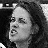

In [0]:
celebanger = Image.open("celeb_fer1.jpg")

celebanger = celebanger.convert('L')
celebanger = celebanger.resize((48,48))
from IPython.display import display
display(celebanger)

In [0]:
celeb_img_np=np.asarray(celebanger)#.getdata()).reshape(48, 48, 1)
celeb_img_np = celeb_img_np.reshape(48, 48, 1)
print(celeb_img_np.shape)
celeb_img_np = celeb_img_np / 255.0
celeb_img_np = celeb_img_np - 0.5
celeb_img_np = celeb_img_np * 2

(48, 48, 1)


In [0]:
print(celeb_img_np.shape)
y = model.predict(celeb_img_np)
print(y)

(48, 48, 1)


ValueError: ignored